<a href="https://colab.research.google.com/github/spqr-86/pandas_cheatsheet/blob/main/2_%D0%97%D0%B0%D0%B3%D1%80%D1%83%D0%B7%D0%BA%D0%B0_%D0%B8_%D0%B2%D1%8B%D0%B3%D1%80%D1%83%D0%B7%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%2C_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%D0%BC%D0%B8%2C_%D0%BF%D0%B5%D1%80%D0%B2%D1%8B%D0%B9_%D0%B2%D0%B7%D0%B3%D0%BB%D1%8F%D0%B4_%D0%BD%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Данные

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#pd.set_option('display.max_columns', None)

data_flats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mh/Анализ данныx/flats_moscow.csv') #файл есть в материалах 1 занятия

data_flats


,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110,77,45,10.0,12.0,5,0,0,1,5
2036,2037,95,60,43,6.0,9.0,5,0,0,1,4
2037,2038,95,60,46,5.0,10.5,5,1,0,1,7
2038,2039,129,76,48,10.0,12.5,5,0,0,1,3


price &mdash;
цена квартиры в $1000

totsp &mdash;
общая площадь квартиры, кв.м.

livesp &mdash;
жилая площадь квартиры, кв.м.

kitsp &mdash;
площадь кухни, кв.м.

dist &mdash;
расстояние от центра в км.

metrdist &mdash;
расстояние до метро в минутах

walk &mdash;
1: пешком от метро, 0: на транспорте

brick &mdash;
1: кирпичный, монолит ж/б, 0: другой

floor &mdash;
1: этаж кроме первого и последнего, 0: иначе.

# Диаграмма рассеяния

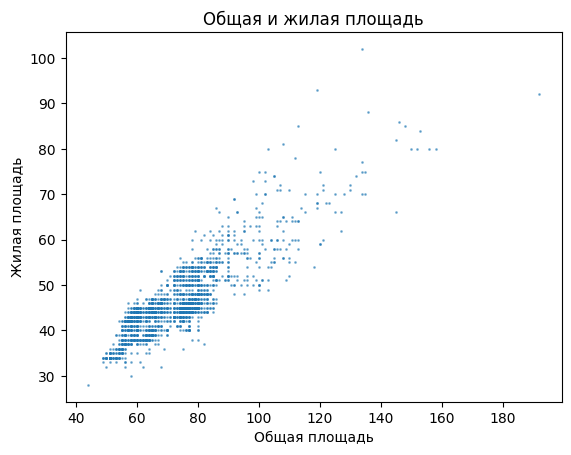

In [ ]:
# data_flats.plot(x='totsp', y='livesp', kind='scatter')

import matplotlib.pyplot as plt
# %matplotlib inline

plt.plot(data_flats['totsp'], data_flats['livesp'], 'o', alpha=0.5, markersize=1)

plt.xlabel('Общая площадь')
plt.ylabel('Жилая площадь')
plt.title('Общая и жилая площадь');

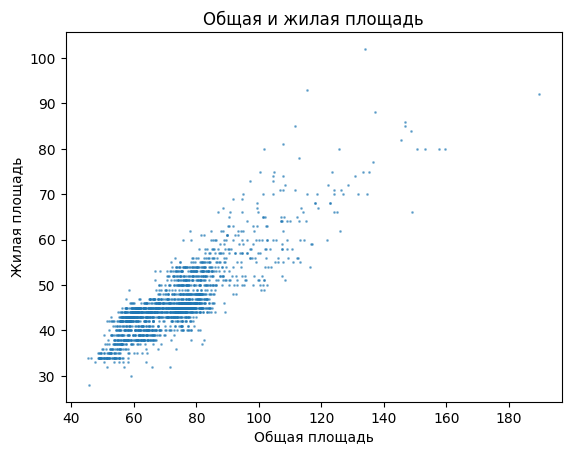

In [ ]:
# data_flats.plot(x='totsp', y='livesp', kind='scatter')

import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

noise = np.random.normal(0, 2, size=len(data_flats['totsp']))
totsp_jitter = data_flats['totsp'] + noise

plt.plot(totsp_jitter, data_flats['livesp'], 'o', alpha=0.5, markersize=1)

plt.xlabel('Общая площадь')
plt.ylabel('Жилая площадь')
plt.title('Общая и жилая площадь');

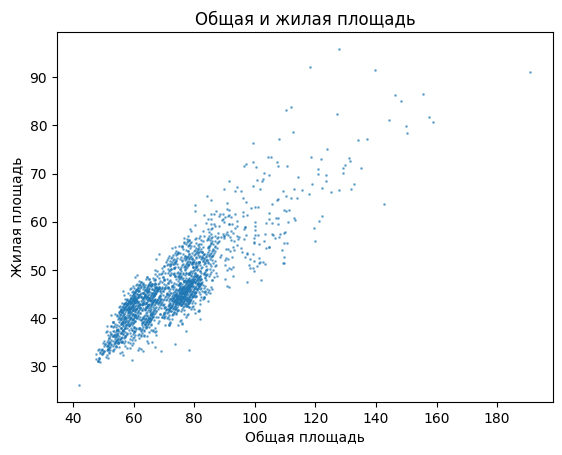

In [ ]:
# data_flats.plot(x='totsp', y='livesp', kind='scatter')

import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

noise = np.random.normal(0, 2, size=len(data_flats['totsp']))
totsp_jitter = data_flats['totsp'] + noise
livesp_jitter = data_flats['livesp'] + noise

plt.plot(totsp_jitter, livesp_jitter, 'o', alpha=0.5, markersize=1)

plt.xlabel('Общая площадь')
plt.ylabel('Жилая площадь')
plt.title('Общая и жилая площадь');

# QQ-plots

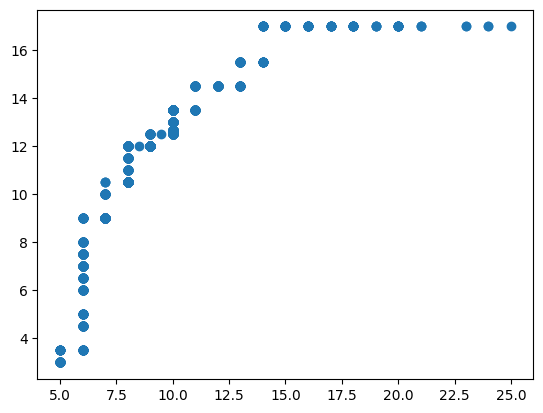

In [ ]:
# квази qq-plot
plt.scatter(np.sort(data_flats['kitsp']), np.sort(data_flats['dist']))

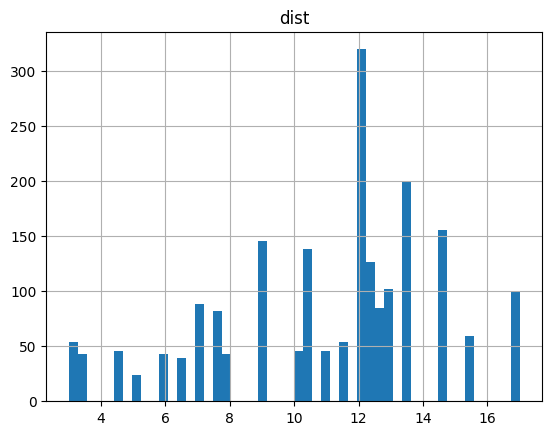

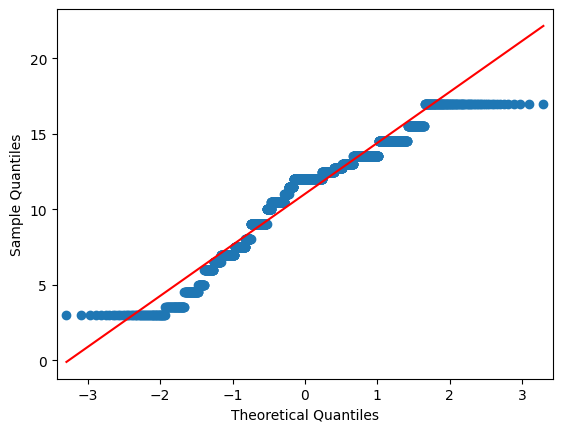

In [ ]:
data_flats.hist('dist', bins=50)

import statsmodels.api as sm

fig = sm.qqplot(data_flats['dist'], line='s')

plt.show()


# Матрица диаграмм рассеивания


Графическое отображение диаграмм рассеивания для всех пар переменных из датасета.

Симметричные относительно главной диагонали диаграммы в свою очередь попарно симметричны относительно прямой y=x &mdash; это те же пары переменных, только переставлены местами горизонтальная и вертикальная оси, то есть какая переменная независимая, а какая зависимая.

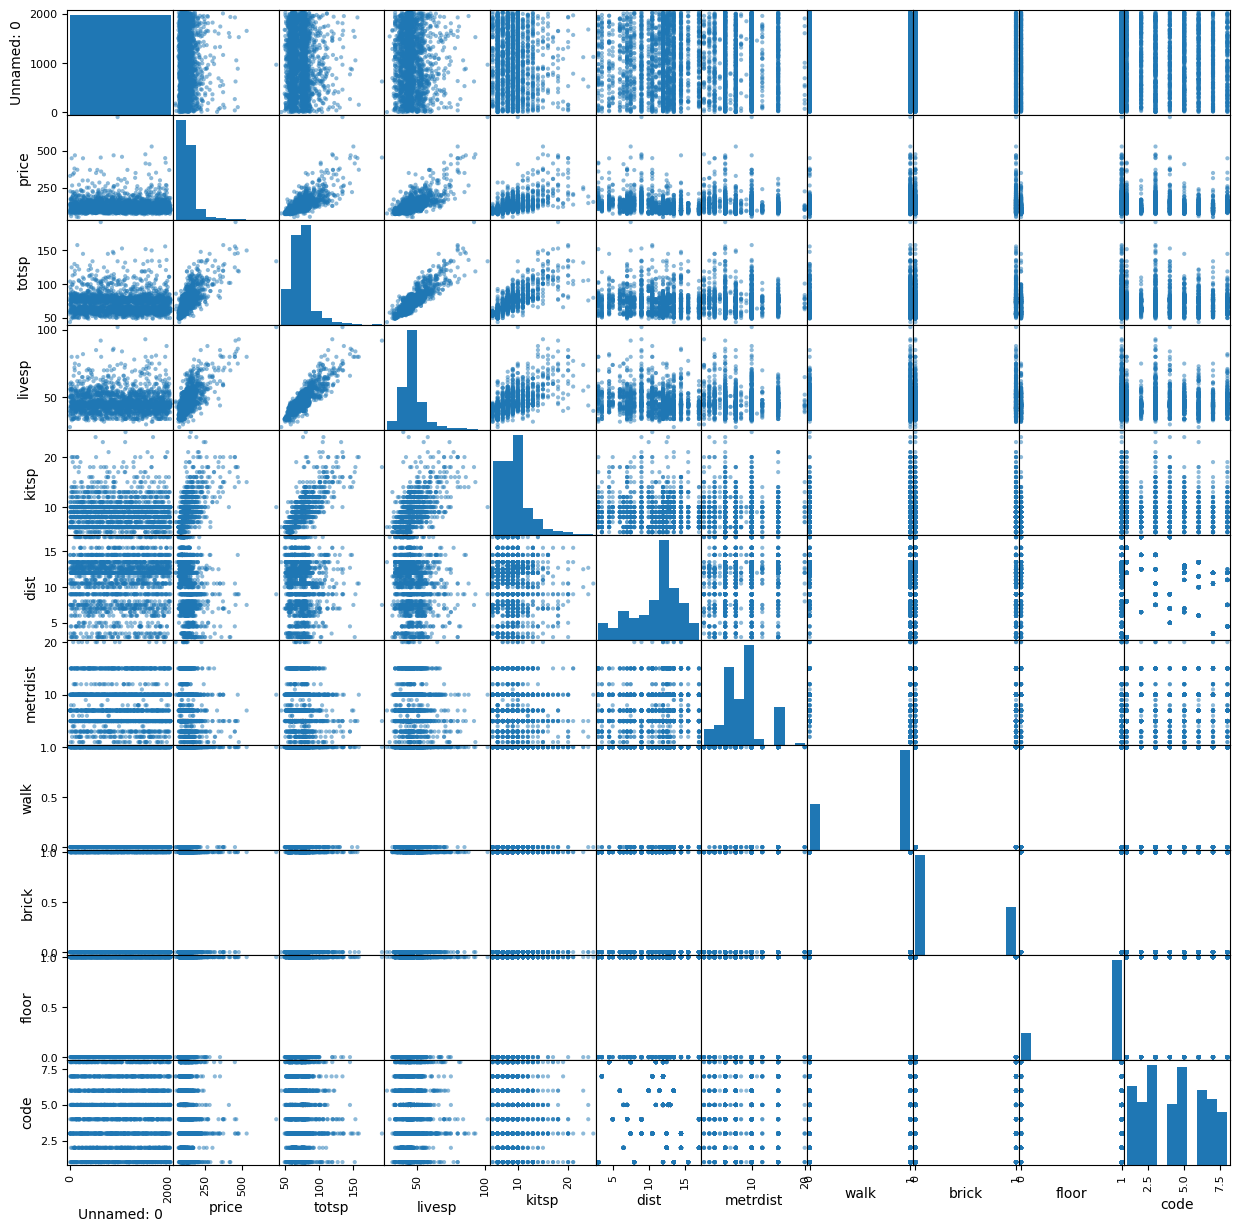

In [ ]:
pd.plotting.scatter_matrix(data_flats, figsize=(15, 15));

# Корреляция

In [ ]:
from scipy import stats
print(stats.pearsonr(data_flats['dist'],data_flats['totsp']))
print(stats.spearmanr(data_flats['dist'],data_flats['totsp']))

PearsonRResult(statistic=-0.11469822730270435, pvalue=2.052960936256807e-07)
SignificanceResult(statistic=-0.11495293009165664, pvalue=1.928621067149472e-07)


# Корреляционная матрица

Коэффициенты корреляции всех пар переменных в датасете.

Симметричные относительно главной диагонали коэффициенты равны &mdash; они показывают корреляцию между теми же парами переменных.

In [ ]:
print(data_flats.corr())

            Unnamed: 0     price     totsp    livesp     kitsp      dist  \
Unnamed: 0    1.000000 -0.022761 -0.036063 -0.031432 -0.029838  0.029367   
price        -0.022761  1.000000  0.756042  0.729614  0.597235 -0.331563   
totsp        -0.036063  0.756042  1.000000  0.862236  0.781536 -0.114698   
livesp       -0.031432  0.729614  0.862236  1.000000  0.573528 -0.197228   
kitsp        -0.029838  0.597235  0.781536  0.573528  1.000000 -0.061874   
dist          0.029367 -0.331563 -0.114698 -0.197228 -0.061874  1.000000   
metrdist      0.007293 -0.152116 -0.041426 -0.052112 -0.028490  0.099185   
walk         -0.010263  0.151996  0.011876  0.060367 -0.009112 -0.175277   
brick        -0.034944  0.260835  0.121287  0.254309 -0.019235 -0.394742   
floor         0.016642  0.132564  0.113723  0.094658  0.117050  0.020530   
code         -0.020986 -0.089623 -0.021959 -0.005480 -0.054632 -0.191975   

            metrdist      walk     brick     floor      code  
Unnamed: 0  0.007293 -0.

<Axes: >

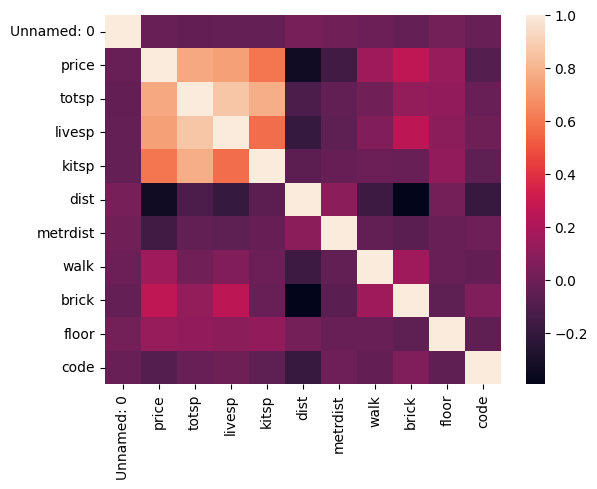

In [ ]:
import seaborn as sns
sns.heatmap(data_flats.corr())

# Уравнение регрессии

In [ ]:
# сэмпл данных
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

x

# # количество наблюдений
# n = np.size(x)
  
# # средние
# m_x = np.mean(x)
# m_y = np.mean(y)
  
# # суммы
# SS_xy = np.sum(y*x) - n * m_y * m_x
# SS_xx = np.sum(x*x) - n * m_x * m_x
  
# # коэффициенты регрессии
# b_1 = SS_xy / SS_xx
# b_0 = m_y - b_1 * m_x

# # нарисуем данные
# plt.scatter(x, y, color = "m", marker = "o", s = 30)
  
# # вектор прогнозируемых значений
# y_pred = b_1 + b_0 * x
  
# # нарисуем линию регрессии
# plt.plot(x, y_pred, color = "g")

# # подписи
# plt.xlabel('x')
# plt.ylabel('y')
  
# # покажем график
# plt.show()


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Квартет Энскомба

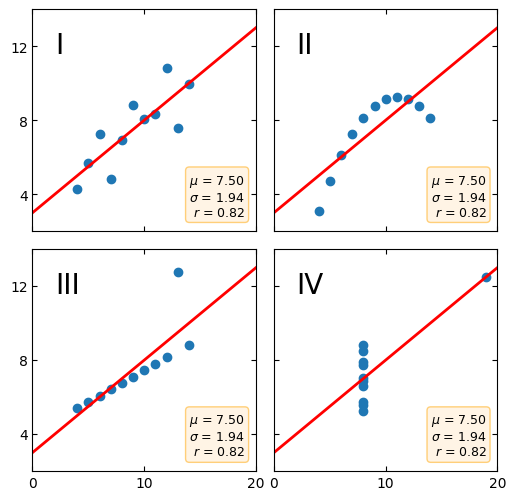

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()